In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
import seaborn as seabornInstance
import mpl_toolkits
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [74]:
#Reading and distributing data 60 20 20
data=pd.read_csv('house_data_complete.csv')
dftraining = data.iloc[0:12967] #60% of data for training
dfcrossvalidation = data.iloc[12967:17289] #20% of data on cross validation
dftesting = data.iloc[17289:21613] # 20% of data on testing
dftraining = dftraining.dropna()
dfcrossvalidation = dfcrossvalidation.dropna()
dftesting = dftesting.dropna()

Text(0.5, 1.0, 'NORMAL DISTRIBUTION OF PRICES')

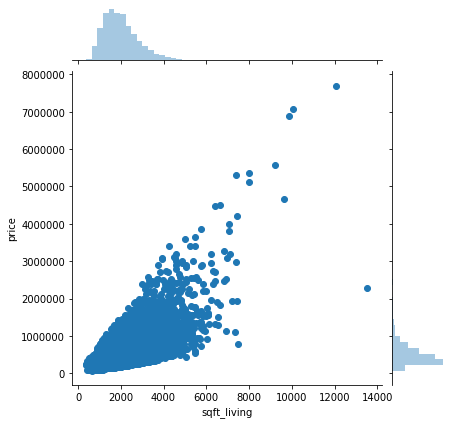

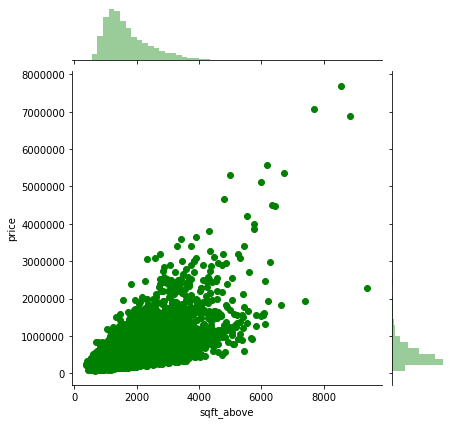

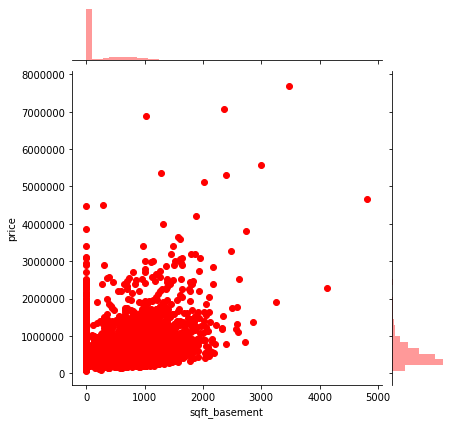

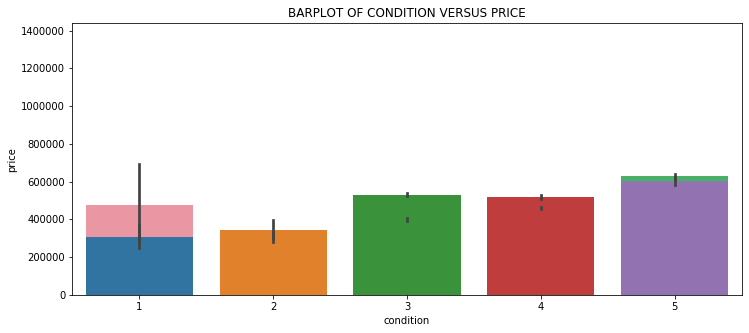

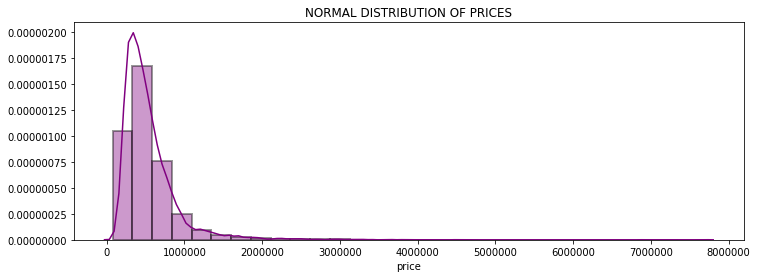

In [75]:
#Visualizing the Data(important features against price)
sns.jointplot(x='sqft_living',y='price',data=dftraining)
sns.jointplot(x='sqft_above',y='price',data=dftraining,color='green')
sns.jointplot(x='sqft_basement',y='price',data=dftraining,color='red')
plt.figure(figsize=(12,5))
sns.barplot(x='bedrooms',y='price',data= dftraining)
plt.title(" BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES")
sns.barplot(x='condition',y='price',data=dftraining)
plt.title("BARPLOT OF CONDITION VERSUS PRICE")
plt.figure(figsize=(12,4))
sns.distplot(data['price'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("NORMAL DISTRIBUTION OF PRICES")

In [76]:
X=dftraining[['bedrooms', 'bathrooms', 'sqft_living',
      'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
      'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y=dftraining['price']
#print(X.size)

In [77]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X);
    sigma = np.std(X);
    X_norm = (X-mu)/sigma;
    
   
    # ================================================================
    return X_norm, mu, sigma

In [78]:
np.std
X_norm, mu, sigma = featureNormalize(X)

In [79]:
m= y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [80]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    h = X.dot(theta)
    #h= (theta.transpose())
    #h= np.dot(theta.transpose())*X
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    # ===========================================================
    return J

In [81]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [82]:
J = computeCost(X, y, theta= np.zeros([17]))

print(J)

209411926049.56866


In [83]:
# initialize fitting parameters
theta= np.zeros([17])

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
#print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: 531605.2970, -46326.1196


In [84]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    # =============================================================


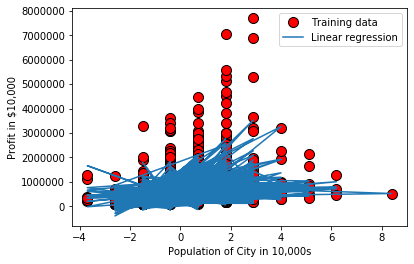

In [85]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

theta computed from gradient descent: [531605.2970361  -46326.11963605  33186.93683413  91136.9114622
   8019.69783179   1088.79215221  18886.77298983 107846.63520991
  82043.30799538  36739.86243839 -87086.1079384   15237.45342973
 -26468.48813861  74116.09412717 -31217.19688206  32760.50885029
 -13053.73079382]


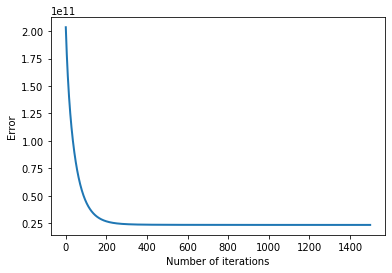

In [86]:
# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [87]:
X[:,2] = X[:,2]*X[:,2];
print(X[:,2])

[1.94562337 0.06155919 1.94562337 ... 0.1673429  1.94562337 0.54415574]


In [88]:
#Hypothesis 2
# initialize fitting parameters
theta = np.zeros([17])
# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 493613.5639, -32344.1572


theta computed from gradient descent: [493613.56385543 -32344.15724487  37897.56247767  71090.28886075
   7409.28219099  13943.80226074  25406.27680571 117990.95678031
  58414.73936506  38670.38130424 -69959.3123978   19168.05845101
 -30005.40231984  73969.27648774 -27972.46286564  47902.23018532
 -13019.1571025 ]


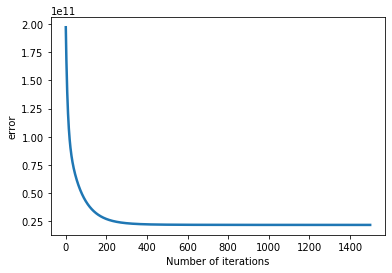

In [89]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [90]:
#Hypothesis 3
X[:,3] = X[:,3]*X[:,3];
print(X[:,3])

[0.91812123 0.32619501 1.98607347 ... 0.06920589 0.83571992 0.5916324 ]


In [91]:
# initialize fitting parameters
theta = np.zeros([17])
# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 489959.0012, -13846.8588


theta computed from gradient descent: [489959.00123138 -13846.85877673  13367.72034719  28136.25707286
   8577.95322892  20965.10507186  26335.52895709 124314.54963826
  69048.3862447   49197.31395165 -66828.60442521  21197.74779319
 -27449.19595083  74543.08693686 -27417.85054144  57268.95347403
 -14778.45741417]


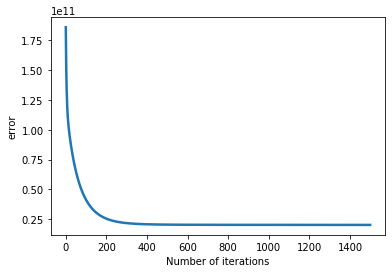

In [92]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [93]:
dataset = pd.read_csv('house_data_complete.csv')
data=dataset.dropna()
X=X=data[['bedrooms', 'bathrooms', 'sqft_living',
      'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
      'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y=data['price']


X= pd.DataFrame(data=X)
kf=KFold(n_splits=5,shuffle=True , random_state=2)
result=next(kf.split(X),None)
print(result)
train=X.iloc[result[0]]
test=X.iloc[result[1]]
#print(train)
#print(test)

(array([    0,     1,     2, ..., 21610, 21611, 21612]), array([    4,     8,    10, ..., 21565, 21568, 21589]))


Theta found by gradient descent: 533247.3421, -4378.3645


Text(0, 0.5, 'Error')

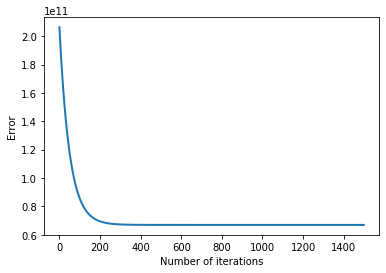

In [94]:
#for train set from kfold... testing
y1=y[0:int(len(y)*0.8)]
theta= np.zeros([17])
m= y1.size
#X_norm=X_norm[0:int(len(X_norm)*0.8)]
train=train.dropna()
#train=featureNormalize(train)
train, mu, sigma = featureNormalize(train)
train = np.concatenate([np.ones((m, 1)), train], axis=1)
#y=y[0:int(len(y)*0.8)]
# some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(train ,y1, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Error')

Theta found by gradient descent: 538716.6342, 4383.2803
theta computed from gradient descent: [ 5.38716634e+05  4.38328032e+03  3.63429935e+03 -6.33433993e+03
 -5.63303489e+03 -7.47538761e+03 -6.65021014e+03  2.45427750e+03
 -1.12942479e+04  8.00856068e+03 -1.00207755e+03 -4.37592301e+03
 -1.64907378e+04 -4.33055729e+02 -1.28462509e+04  2.43835778e+04
  2.03581580e+03]


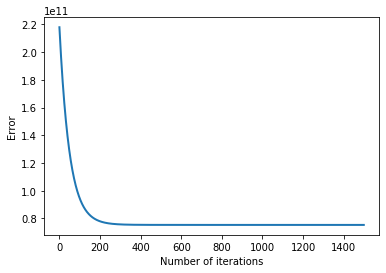

In [95]:
#for test set from the kfold 
y2=y[0:int(len(y)*0.2)]
theta= np.zeros([17])
m= y2.size
test=test.dropna()
test, mu, sigma = featureNormalize(test)
test= test[:-1]
test = np.concatenate([np.ones((m, 1)), test], axis=1)
# some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(test ,y2, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [96]:
#testing kfold
theta= [531605.2970361 ,  -46326.11963605 ,  33186.93683413 ,  91136.9114622,
   8019.69783179,   1088.79215221,  18886.77298983 , 107846.63520991,
  82043.30799538,  36739.86243839, -87086.1079384 ,   15237.45342973,
 -26468.48813861,  74116.09412717, -31217.19688206 ,  32760.50885029 ]
Xtest=dftesting[['bedrooms', 'bathrooms', 'sqft_living',
      'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
      'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
ytest=dftesting['price']
computeCost(Xtest, ytest, theta)


1.5199365524289466e+19